# Git-Punch Notebook
### Brief

Punchcard Diagram (similar to Github's Punchcard) showing all the commits for a git repository done across the days of the week (y-axis) and time of day (x-axis).

__Version:__

`alpha-0.0.2`

__Usage:__

1. Run `git-punch.py` to gather the data from a valid git repository's directory
2. use -o to specify the output file location
3. Click Cell -> Run All

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
# Read the raw json file
data_location = r'../tmp/data.json'
# convert_axes is True by default
# changed to False in order not to
# convert the days to dates
rdata = pd.read_json(data_location, convert_axes=True)

In [3]:
# Convert Timestamp to Weekday
rdata.columns = rdata.columns.map(lambda x: x.strftime('%A'))

In [4]:
# Sort the index
rdata.sort(axis=0, ascending=True, inplace=True)
# Sort the columns
rdata.sort(axis=1, ascending=True, inplace=True)

In [5]:
# This is to be excuted once and only once!
# This will convert the index to column and vice versa
rdata = rdata.transpose()

In [6]:
# The below code has been modified from its original form found below
# http://stackoverflow.com/questions/14849815/matplotlib-how-to-remove-the-vertical-space-when-displaying-circles-on-a-grid
# Original author: http://stackoverflow.com/users/2023144/rgiot

# ax1 : Days of the week
ax1 = range(7)
# ax2 : Hours per day
ax2 = range(24)
# Ticks
ax1_ticks = rdata.index
ax2_ticks = range(24)

# Convert the DataFrame to a 2D Array
data = np.zeros((len(ax1),len(ax2)))
for i in xrange(7):
    for j in xrange(24):
        data[i,j] = rdata.iloc[i, j]

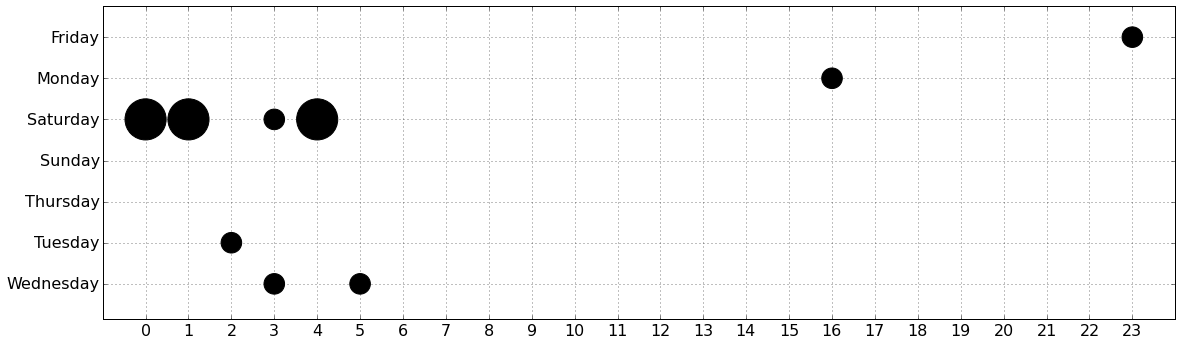

In [7]:
data = data/float(np.max(data))

# Shape Ratio
r = float(data.shape[1])/data.shape[0]

ar = np.arange(0,len(ax1)/r-0.1,1/r)
ls = np.linspace(0,len(ax1), len(ax2))

# Draw the Circles
for y in xrange(data.shape[0]):
    for x in xrange(data.shape[1]):
        # Define the circle properties
        circle = plt.Circle((ls[x],y/r), 
                            data[y][x]/float(data.shape[1])*data.shape[0]/2,
                            facecolor =(0,0,0))
        # Draw the circle
        plt.gca().add_artist(circle)

        
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
        
plt.ylim(0-0.5,  data.shape[0]-0.5)
plt.xlim(0, data.shape[0])
plt.yticks(ar, ax1_ticks)
plt.xticks(ls, ax2_ticks)
plt.gca().invert_yaxis()

# # Invert axes
plt.gca().invert_yaxis()
# Enable the grid
plt.grid(True)

# Make sure the axes are equal, 
# and resize the canvas to fit the plot
plt.axis('equal')
plt.axis([-0.3, 7.3, 8.5/r, -0.7])
scale = 0.8
plt.gcf().set_size_inches(data.shape[1]*scale,data.shape[0]*scale, forward=True)

# Show the plot
plt.show()